## In this notebook we are going to Predict the Growth of Google Stock using Linear Regression Model and CRISP-DM.

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Data Understanding

The data is already processed to price-split values so it is easy to analysis but we are creating new tables to optimize our model

In [2]:
#importing Price Split Data
data = pd.read_csv('prices-split-adjusted.csv')

In [3]:
data

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [4]:
#checking data for null values
data.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

#### There are no null values in the Data table we are going to create

# Data Preprocessing

Creating Table for a specific Stock

In [5]:
#Initializing the Dataset for the Stock to be Analysized
data = data.loc[(data['symbol'] == 'GOOG')]
data = data.drop(columns=['symbol'])
data = data[['date', 'open', 'close', 'low', 'volume', 'high']]
data

,date,open,close,low,volume,high
439,2010-01-04,312.304948,312.205308,310.955001,3927000.0,313.580158
907,2010-01-05,312.419511,310.830459,309.610028,6031900.0,312.748278
1375,2010-01-06,311.761979,302.994813,302.048370,7987100.0,311.761979
1843,2010-01-07,303.562685,295.941242,295.218951,12876600.0,303.861575
2311,2010-01-08,294.895159,299.886470,293.455551,9483900.0,300.499172
...,...,...,...,...,...,...
848963,2016-12-23,790.900024,789.909973,787.280029,623400.0,792.739990
849463,2016-12-27,790.679993,791.549988,787.656982,789100.0,797.859985
849963,2016-12-28,793.700012,785.049988,783.200012,1132700.0,794.229980
850463,2016-12-29,783.330017,782.789978,778.919983,742200.0,785.929993


In [6]:
#Number of rows and columns we are working with
data.shape

(1762, 6)

Ploting the closing price of the Stock

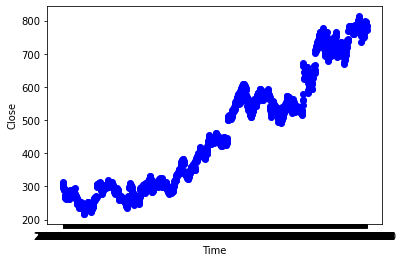

In [7]:
plt.scatter(data.date, data.close, color='blue')
plt.xlabel("Time")
plt.ylabel("Close")
plt.show()

### Here we can see that the Stock is growing in Long-Term with multiple medium downfalls 
So it is good for Long-term investing

In [8]:
#For plotting against time
data['date'] = pd.to_datetime(data.date)

<AxesSubplot:>

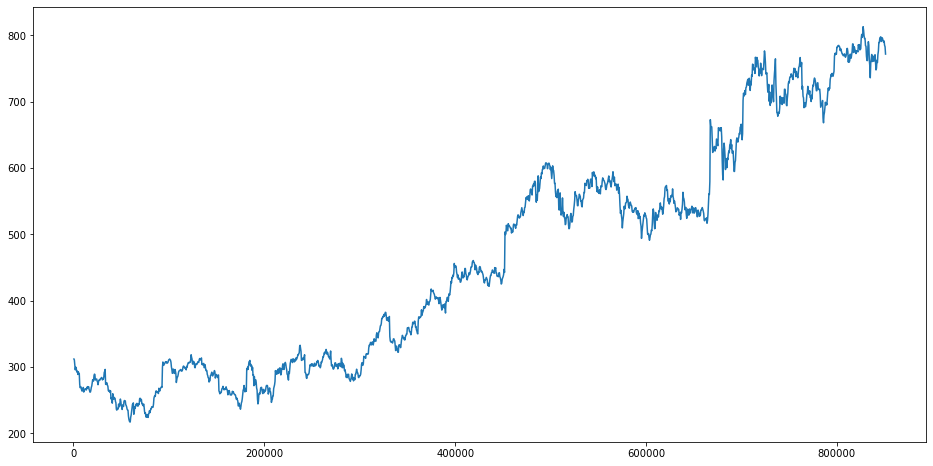

In [9]:
#Plot for close values on each date
data['close'].plot(figsize=(16, 8))

# Linear Regression

Here we are going to use LR to make simple prediction of the stock value change. We are checking for accuracy on a particular Stock.

In [10]:
x1 = data[['open', 'high', 'low', 'volume']]
y1 = data['close']

In [11]:
#Making test and train datasets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state = 0)

In [12]:
x1_train.shape

(1321, 4)

In [13]:
x1_test.shape

(441, 4)

In [14]:
#Initailizing LinearRegression
regression = LinearRegression()

In [15]:
regression.fit(x1_train, y1_train)

LinearRegression()

In [16]:
print(regression.coef_)

[-5.68018424e-01  7.64054774e-01  8.04459306e-01 -1.64964840e-08]


In [17]:
print(regression.intercept_)

0.1633899880290528


In [18]:
predicted = regression.predict(x1_test)

In [19]:
#Predictions for Stock values
print(x1_test)

              open        high         low      volume
555060  584.278523  585.096276  580.977544   1036700.0
314099  330.257677  334.745874  328.389693   5246900.0
193779  251.059406  252.553808  246.342066   9848500.0
262399  316.120659  322.486789  315.074576   4957600.0
643115  523.989990  533.460022  521.750000   1546300.0
...            ...         ...         ...         ...
435554  426.282927  427.418671  421.201955   3737100.0
45384   233.654606  241.594866  231.333298  19454100.0
361768  369.236656  377.002538  368.873008   6790600.0
83842   240.972185  244.683281  239.691985  11325400.0
51012   242.700718  243.527624  235.119116   5478300.0

[441 rows x 4 columns]


In [20]:
predicted.shape

(441,)

# Evaluation of the model

Making table for Actual price and Predicted Price

In [21]:
dframe = pd.DataFrame(y1_test, predicted)
dfr = pd.DataFrame({'Actual_Price':y1_test, 'Predicted_Price':predicted})
print(dfr)

        Actual_Price  Predicted_Price
555060    582.892287       582.683718
314099    333.361045       332.424718
193779    248.155287       248.531667
262399    318.795621       320.381494
643115    530.700012       529.821233
...              ...              ...
435554    421.869467       423.376293
45384     235.144034       237.812280
361768    375.697452       375.112059
83842     244.160254       242.873797
51012     236.125344       237.426743

[441 rows x 2 columns]


In [22]:
#Actual values vs Predicted Values 
dfr.head(10)

,Actual_Price,Predicted_Price
555060,582.892287,582.683718
314099,333.361045,332.424718
193779,248.155287,248.531667
262399,318.795621,320.381494
643115,530.700012,529.821233
632741,540.129520,541.486397
513900,533.348118,533.219415
473720,548.255945,547.221167
813463,762.489990,765.895641
850963,771.820007,773.368222


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
#Regrssion Score Analysis
regression.score(x1_test, y1_test)

0.9998110820947373

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, predicted)))

Mean Absolute Error: 1.6941834555992499
Mean Squared Error: 5.702167323809326
Root Mean Squared Error: 2.387921130148424


In [26]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = x2/y2*100
print("The accuracy of the model is " , Accuracy1)

The accuracy of the model is  100.01116524633264


# Deploying the model by visualization

### Plotting Acutal Close values vs Predicted Values in LR Model

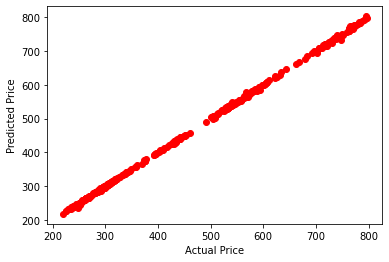

In [27]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.show()

We can see that using simple Linear Regression on a Scalar and Linear entity as Stock Price over a period of time gives a simple and straight line. Stating that the stock is growing over time. So now we are some what confident in investing in this stock. To better understand next we are using LSTM model.